In [1]:
import pandas as pd
import cv2
import os
import numpy as np
import faiss
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
paths_db = pd.read_csv("database\db.csv", index_col=0)
paths = paths_db["path"].values.tolist()

In [3]:
def get_image(url):
    img = cv2.imread(url)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

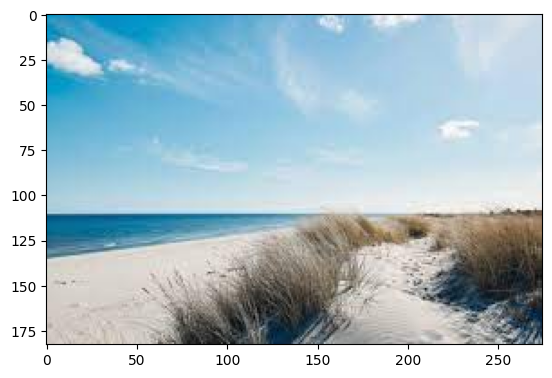

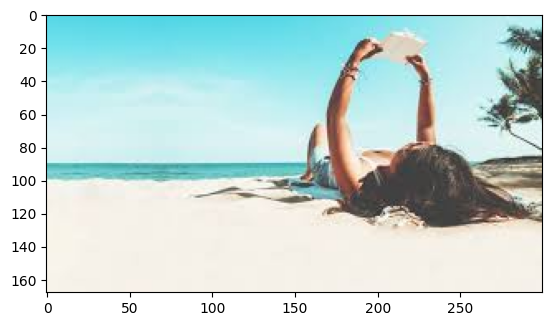

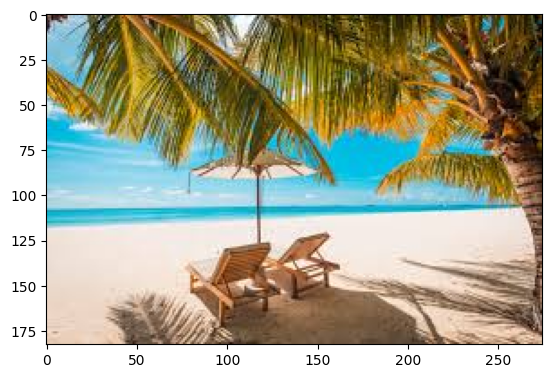

In [4]:
for path in paths[:3]:
    img = get_image(path)
    plt.imshow(img)
    plt.show()

In [5]:
sift = cv2.SIFT_create()
kps = []
descs = []
path_img_ref = paths[0]

img_ref = cv2.imread(path_img_ref)
img_ref= cv2.cvtColor(img_ref, cv2.COLOR_BGR2GRAY)

# Display the image (optional)
# plt.imshow(img, cmap='gray')
# plt.title(f"Image: {path}")
# plt.axis('off')
# plt.show()

# Detect and compute SIFT keypoints and descriptors
kp_ref, desc_ref = sift.detectAndCompute(img, None)

print(f"Processed {len(kp_ref)} keypoints in image: {path}")


Processed 497 keypoints in image: archive\Training Data\Coast\Coast-Train (100).jpeg


In [6]:
type(desc_ref)

numpy.ndarray

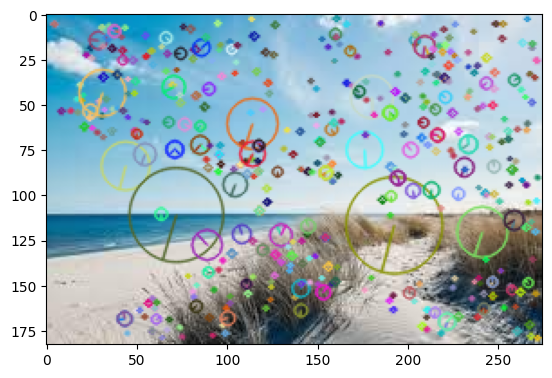

In [7]:
im1_sift = cv2.drawKeypoints(get_image(path_img_ref), kp_ref, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im1_sift)
plt.show()

In [ ]:
#Compare all the descriptors and keypoints and find the 5 best matches for one image
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches_result = [] 

for path in paths[1:]:
    img = cv2.imread(path)
    
    # Check if the image is loaded successfully
    if img is None:
        print(f"Error: Could not load image at path: {path}")
        continue  # Skip to the next image
    
    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints_cmp, descriptors_cmp = sift.detectAndCompute(img, mask=None)
    if descriptors_cmp is None:
        print(f"No se detectaron descriptores en la imagen {path}.")
        descriptors_cmp = np.array([])  # Manejo de casos donde no haya descriptores
    else:
        descriptors_cmp = np.float32(descriptors_cmp)  # Asegurarse de que sean float32
    
    # Verificar que los descriptores no estén vacíos antes de emparejar
    if desc_ref.size == 0 or descriptors_cmp.size == 0:
        print(f"Saltando emparejamiento para {path} debido a descriptores vacíos.")
        continue  # Saltar al siguiente conjunto de imágenes si no hay descriptores válidos
    
    matches = bf.match(desc_ref, descriptors_cmp)
    matches = sorted(matches, key = lambda x:x.distance) # Sort matches by distance

    # Append the matches to the list
    matches_result.append((len(matches), path,matches, keypoints_cmp, img))

# Sort the matches by the number of matches
matches_result = sorted(matches_result, key=lambda x: x[0], reverse=True)


No se detectaron descriptores en la imagen archive\Training Data\Desert\Desert-Train (1057).jpeg.
Saltando emparejamiento para archive\Training Data\Desert\Desert-Train (1057).jpeg debido a descriptores vacíos.


Imagen 1: archive\Training Data\Coast\Coast-Train (100).jpeg con 321 coincidencias


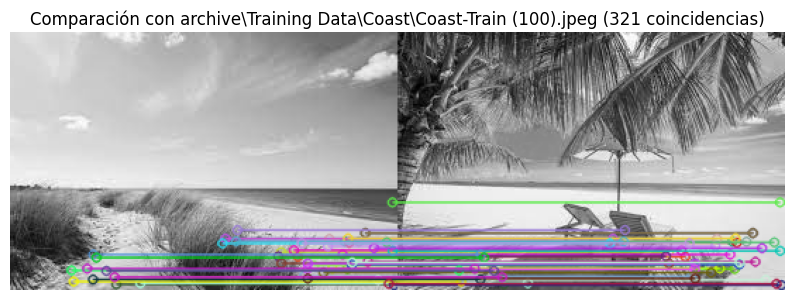

Imagen 2: archive\Training Data\Forest\Forest-Train (102).jpeg con 210 coincidencias


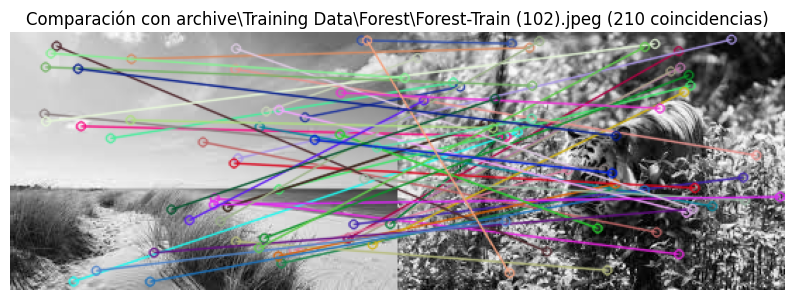

Imagen 3: archive\Training Data\Forest\Forest-Train (1076).jpeg con 205 coincidencias


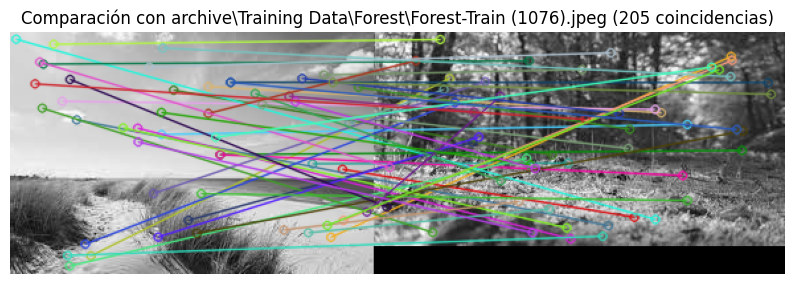

Imagen 4: archive\Training Data\Forest\Forest-Train (1026).jpeg con 189 coincidencias


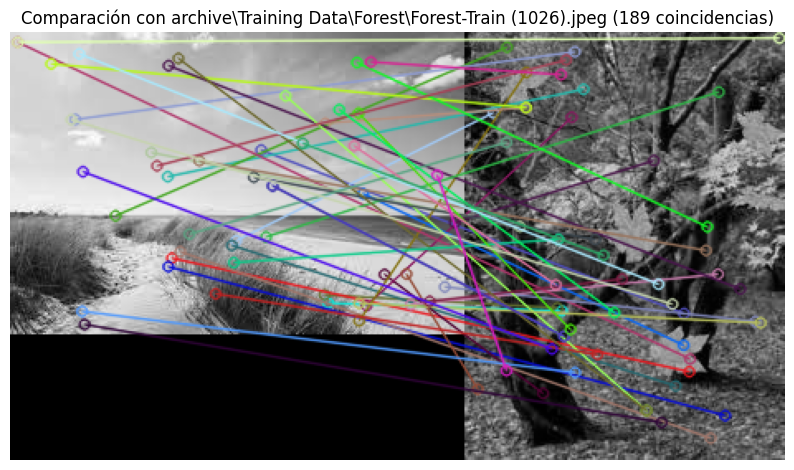

Imagen 5: archive\Training Data\Forest\Forest-Train (1088).jpeg con 187 coincidencias


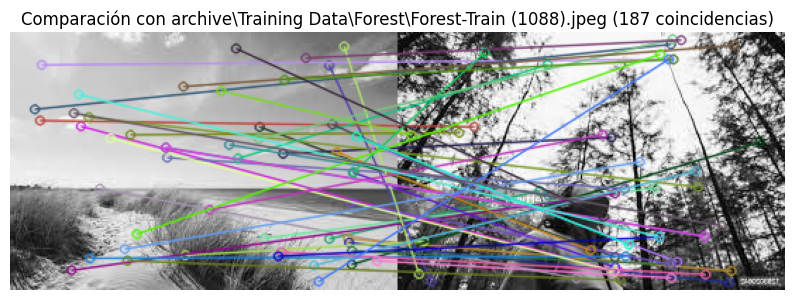

In [9]:
# Mostrar las 5 mejores coincidencias
for i, (num_matches, url, matches, keypoints_cmp, comparison_image) in enumerate(matches_result[:5]):
    print(f"Imagen {i + 1}: {url} con {num_matches} coincidencias")
    
    # Dibujar coincidencias
    im_match = cv2.drawMatches(img_ref[..., ::-1], kp_ref,
                               comparison_image[..., ::-1], keypoints_cmp, matches[:50],
                               None, flags=2)
    
    # Mostrar coincidencias
    plt.figure(figsize=(10, 10))
    plt.imshow(im_match)
    plt.title(f"Comparación con {url} ({num_matches} coincidencias)")
    plt.axis('off')
    plt.show()

Imagen 1: archive\Training Data\Coast\Coast-Train (100).jpeg con 321 coincidencias


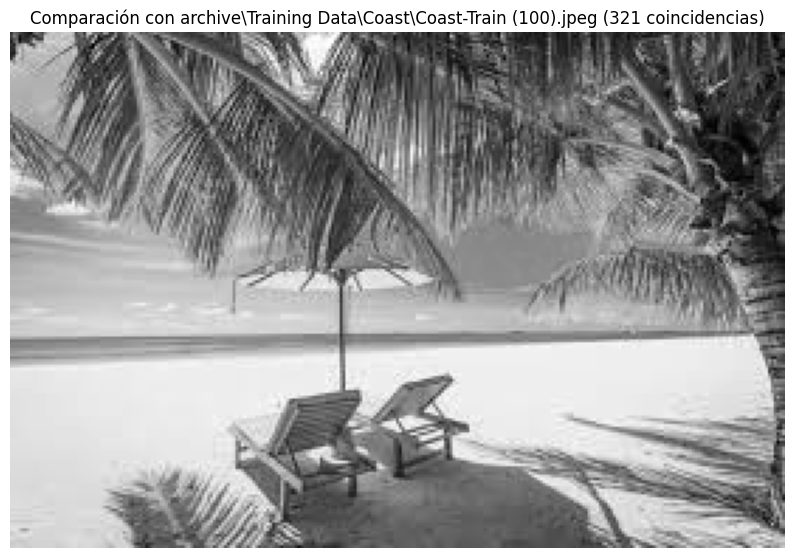

Imagen 2: archive\Training Data\Forest\Forest-Train (102).jpeg con 210 coincidencias


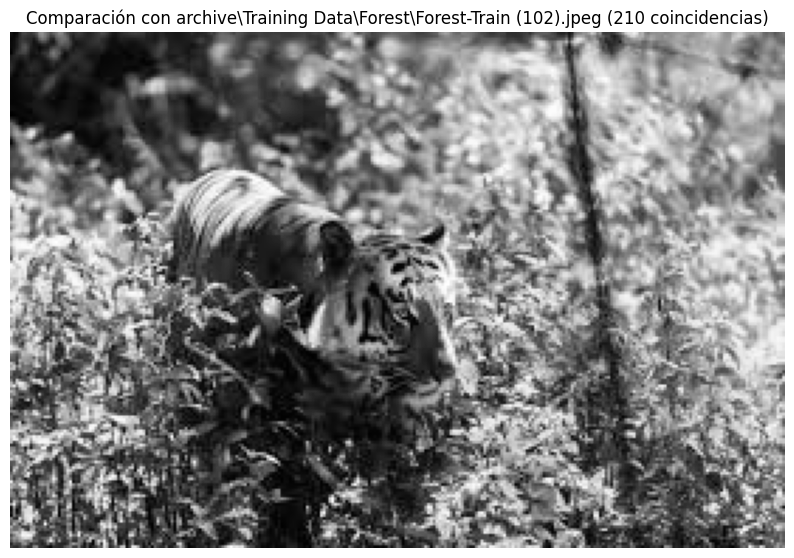

Imagen 3: archive\Training Data\Forest\Forest-Train (1076).jpeg con 205 coincidencias


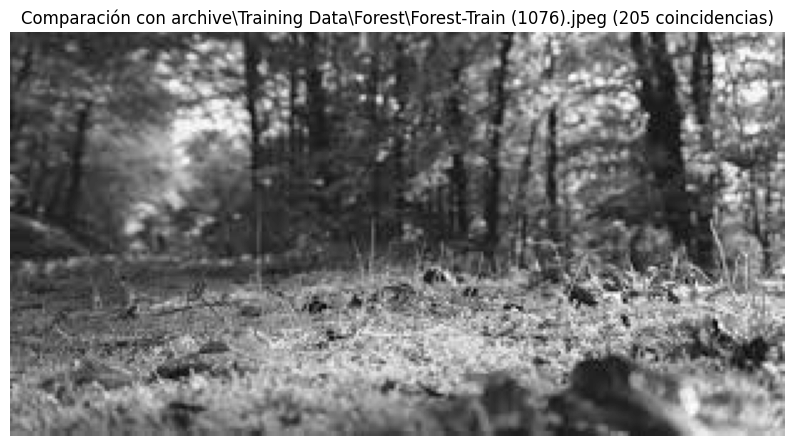

Imagen 4: archive\Training Data\Forest\Forest-Train (1026).jpeg con 189 coincidencias


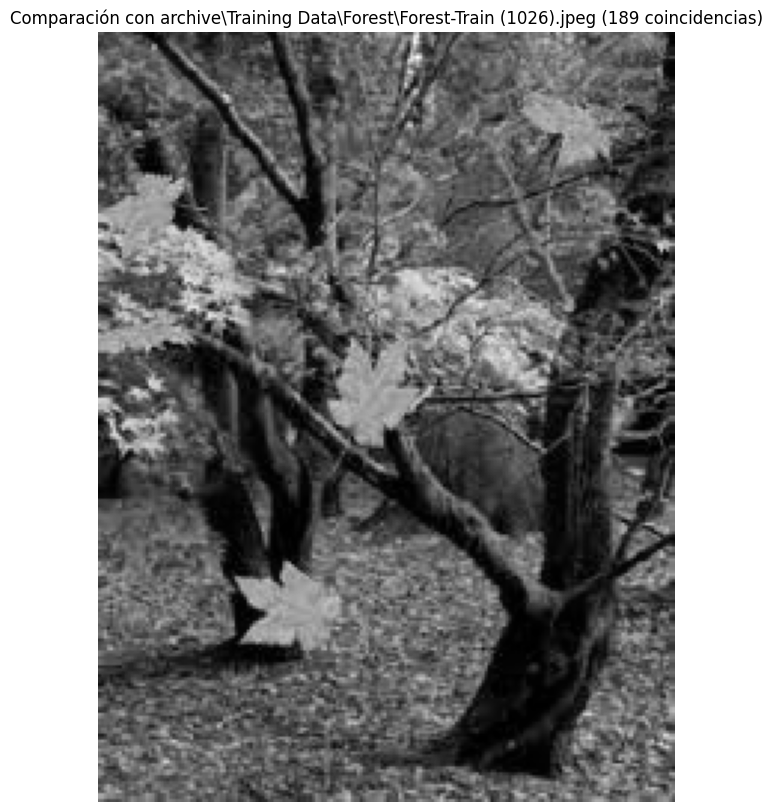

Imagen 5: archive\Training Data\Forest\Forest-Train (1088).jpeg con 187 coincidencias


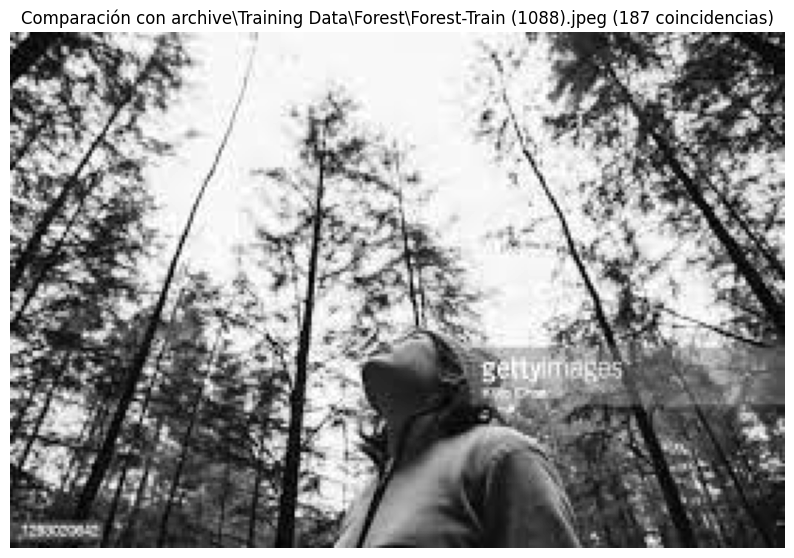

In [10]:
# Mostrar las 5 mejores coincidencias sin los puntos clave

for i, (num_matches, url, matches, keypoints_cmp, comparison_image) in enumerate(matches_result[:5]):
    print(f"Imagen {i + 1}: {url} con {num_matches} coincidencias")
    plt.figure(figsize=(10, 10))
    plt.imshow(comparison_image, cmap='gray')
    plt.title(f"Comparación con {url} ({num_matches} coincidencias)")
    plt.axis('off')
    plt.show()